# Decision Tree

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = sns.load_dataset('tips')

In [46]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [47]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [48]:
df['sex'] = df['sex'].map({'Male' : 1 , 'Female' : 2})



In [49]:
df['sex'].astype(int)

0      2
1      1
2      1
3      1
4      2
      ..
239    1
240    2
241    1
242    1
243    2
Name: sex, Length: 244, dtype: int32

In [50]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [51]:
df['smoker'] = df['smoker'].map({'Yes' : 0 , 'No' : 1})

In [52]:
df['smoker'].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Name: smoker, Length: 244, dtype: int32

In [53]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,2,1,Sun,Dinner,2
1,10.34,1.66,1,1,Sun,Dinner,3
2,21.01,3.50,1,1,Sun,Dinner,3
3,23.68,3.31,1,1,Sun,Dinner,2
4,24.59,3.61,2,1,Sun,Dinner,4


In [54]:
x = df[['total_bill' , "tip" , 'sex']]
x

,total_bill,tip,sex
0,16.99,1.01,2
1,10.34,1.66,1
2,21.01,3.50,1
3,23.68,3.31,1
4,24.59,3.61,2
...,...,...,...
239,29.03,5.92,1
240,27.18,2.00,2
241,22.67,2.00,1
242,17.82,1.75,1


<Axes: xlabel='total_bill', ylabel='tip'>

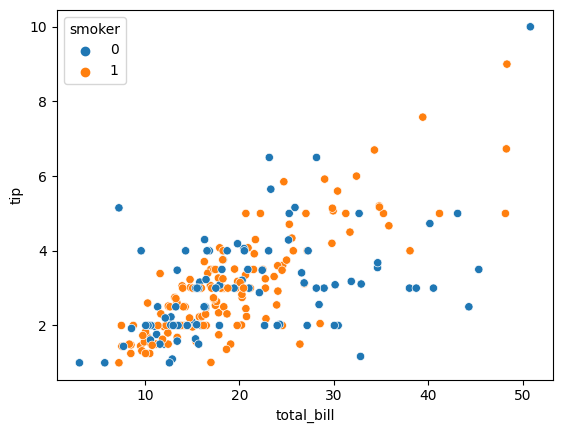

In [67]:
sns.scatterplot(x = 'total_bill' , y= 'tip' , data=df , hue='smoker')

In [55]:
y = df['smoker']
y

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    0
241    0
242    1
243    1
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [0, 1]

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [57]:
sc.fit(x)

StandardScaler()

In [58]:
x = pd.DataFrame(sc.transform(x) , columns = x.columns)

In [59]:
x.head()

,total_bill,tip,sex
0,-0.314711,-1.439947,1.343353
1,-1.063235,-0.969205,-0.744406
2,0.137780,0.363356,-0.744406
3,0.438315,0.225754,-0.744406
4,0.540745,0.443020,1.343353


In [60]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=20)

In [61]:
# Decision Tree ----------------------------------------------------------

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
dt.score(x_test, y_test)*100

53.06122448979592

In [63]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,2,1,Sun,Dinner,2
1,10.34,1.66,1,1,Sun,Dinner,3
2,21.01,3.50,1,1,Sun,Dinner,3
3,23.68,3.31,1,1,Sun,Dinner,2
4,24.59,3.61,2,1,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,1,Sat,Dinner,3
240,27.18,2.00,2,0,Sat,Dinner,2
241,22.67,2.00,1,0,Sat,Dinner,2
242,17.82,1.75,1,1,Sat,Dinner,2


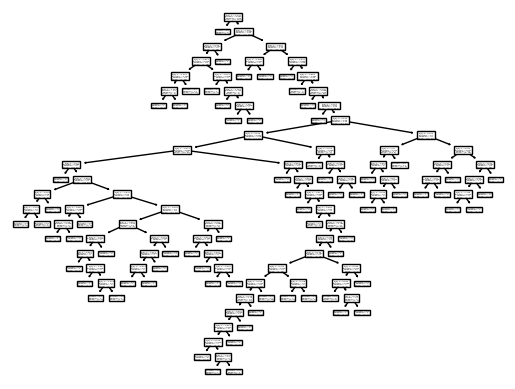

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt)
plt.show()